In [1]:
import asyncio
import tempfile
from pathlib import Path

from epinterface.sbem.builder import SimulationPathConfig
from epinterface.sbem.components.envelope import (
    ConstructionAssemblyComponent,
    ConstructionLayerComponent,
    EnvelopeAssemblyComponent,
    GlazingConstructionSimpleComponent,
    InfiltrationComponent,
    ZoneEnvelopeComponent,
)
from epinterface.sbem.components.materials import (
    ConstructionMaterialComponent,
)
from epinterface.sbem.components.operations import (
    ZoneOperationsComponent,
)
from epinterface.sbem.components.schedules import (
    DayComponent,
    WeekComponent,
    YearComponent,
)
from epinterface.sbem.components.space_use import (
    EquipmentComponent,
    LightingComponent,
    OccupancyComponent,
    ThermostatComponent,
    WaterUseComponent,
    ZoneSpaceUseComponent,
)
from epinterface.sbem.components.systems import (
    ConditioningSystemsComponent,
    DHWComponent,
    ThermalSystemComponent,
    VentilationComponent,
    ZoneHVACComponent,
)
from epinterface.sbem.components.zones import (
    ZoneComponent,
)

# Thermostat

In [2]:
thermostat_heating_day = DayComponent(
    Name="Thermostat Heating Day",
    Type="Temperature",
    Hour_00=21,
    Hour_01=21,
    Hour_02=21,
    Hour_03=21,
    Hour_04=21,
    Hour_05=21,
    Hour_06=21,
    Hour_07=21,
    Hour_08=21,
    Hour_09=21,
    Hour_10=21,
    Hour_11=21,
    Hour_12=21,
    Hour_13=21,
    Hour_14=21,
    Hour_15=21,
    Hour_16=21,
    Hour_17=21,
    Hour_18=21,
    Hour_19=21,
    Hour_20=21,
    Hour_21=21,
    Hour_22=21,
    Hour_23=21,
)

thermostat_cooling_day = DayComponent(
    Name="Thermostat Cooling Day",
    Type="Temperature",
    Hour_00=25,
    Hour_01=25,
    Hour_02=25,
    Hour_03=25,
    Hour_04=25,
    Hour_05=25,
    Hour_06=25,
    Hour_07=25,
    Hour_08=25,
    Hour_09=25,
    Hour_10=25,
    Hour_11=25,
    Hour_12=25,
    Hour_13=25,
    Hour_14=25,
    Hour_15=25,
    Hour_16=25,
    Hour_17=25,
    Hour_18=25,
    Hour_19=25,
    Hour_20=25,
    Hour_21=25,
    Hour_22=25,
    Hour_23=25,
)

thermostat_heating_week = WeekComponent(
    Name="Thermostat Heating Week",
    Monday=thermostat_heating_day,
    Tuesday=thermostat_heating_day,
    Wednesday=thermostat_heating_day,
    Thursday=thermostat_heating_day,
    Friday=thermostat_heating_day,
    Saturday=thermostat_heating_day,
    Sunday=thermostat_heating_day,
)

thermostat_cooling_week = WeekComponent(
    Name="Thermostat Cooling Week",
    Monday=thermostat_cooling_day,
    Tuesday=thermostat_cooling_day,
    Wednesday=thermostat_cooling_day,
    Thursday=thermostat_cooling_day,
    Friday=thermostat_cooling_day,
    Saturday=thermostat_cooling_day,
    Sunday=thermostat_cooling_day,
)

thermostat_heating_year = YearComponent(
    Name="Thermostat Heating Year",
    January=thermostat_heating_week,
    February=thermostat_heating_week,
    March=thermostat_heating_week,
    April=thermostat_heating_week,
    May=thermostat_heating_week,
    June=thermostat_heating_week,
    July=thermostat_heating_week,
    August=thermostat_heating_week,
    September=thermostat_heating_week,
    October=thermostat_heating_week,
    November=thermostat_heating_week,
    December=thermostat_heating_week,
    Type="Setpoint",
)

thermostat_cooling_year = YearComponent(
    Name="Thermostat Cooling Year",
    January=thermostat_cooling_week,
    February=thermostat_cooling_week,
    March=thermostat_cooling_week,
    April=thermostat_cooling_week,
    May=thermostat_cooling_week,
    June=thermostat_cooling_week,
    July=thermostat_cooling_week,
    August=thermostat_cooling_week,
    September=thermostat_cooling_week,
    October=thermostat_cooling_week,
    November=thermostat_cooling_week,
    December=thermostat_cooling_week,
    Type="Setpoint",
)

thermostat = ThermostatComponent(
    Name="Thermostat",
    HeatingSchedule=thermostat_heating_year,
    CoolingSchedule=thermostat_cooling_year,
    HeatingSetpoint=21,
    CoolingSetpoint=25,
    IsOn=True,
)

# Lighting

In [3]:
lighting_day = DayComponent(
    Name="Lighting Fractional Day",
    Type="Fraction",
    Hour_00=0.7,
    Hour_01=0.3,
    Hour_02=0.1,
    Hour_03=0.1,
    Hour_04=0.1,
    Hour_05=0.3,
    Hour_06=0.3,
    Hour_07=0.1,
    Hour_08=0.1,
    Hour_09=0.1,
    Hour_10=0.1,
    Hour_11=0.1,
    Hour_12=0.1,
    Hour_13=0.1,
    Hour_14=0.1,
    Hour_15=0.4,
    Hour_16=0.7,
    Hour_17=0.8,
    Hour_18=0.9,
    Hour_19=1.0,
    Hour_20=1.0,
    Hour_21=1.0,
    Hour_22=0.9,
    Hour_23=0.8,
)

lighting_week = WeekComponent(
    Name="Lighting Week",
    Monday=lighting_day,
    Tuesday=lighting_day,
    Wednesday=lighting_day,
    Thursday=lighting_day,
    Friday=lighting_day,
    Saturday=lighting_day,
    Sunday=lighting_day,
)

lighting_year = YearComponent(
    Name="Lighting Year",
    January=lighting_week,
    February=lighting_week,
    March=lighting_week,
    April=lighting_week,
    May=lighting_week,
    June=lighting_week,
    July=lighting_week,
    August=lighting_week,
    September=lighting_week,
    October=lighting_week,
    November=lighting_week,
    December=lighting_week,
    Type="Lighting",
)

lighting = LightingComponent(
    Name="Lighting",
    Schedule=lighting_year,
    PowerDensity=3,
    DimmingType="Off",
    IsOn=True,
)

# Equipment

In [4]:
equipment_day = DayComponent(
    Name="equipment Fractional Day",
    Type="Fraction",
    Hour_00=0.7,
    Hour_01=0.3,
    Hour_02=0.1,
    Hour_03=0.1,
    Hour_04=0.1,
    Hour_05=0.3,
    Hour_06=0.3,
    Hour_07=0.5,
    Hour_08=0.5,
    Hour_09=0.5,
    Hour_10=0.5,
    Hour_11=0.5,
    Hour_12=0.5,
    Hour_13=0.5,
    Hour_14=0.5,
    Hour_15=0.5,
    Hour_16=0.7,
    Hour_17=0.8,
    Hour_18=0.9,
    Hour_19=0.7,
    Hour_20=0.7,
    Hour_21=0.7,
    Hour_22=0.9,
    Hour_23=0.8,
)

equipment_week = WeekComponent(
    Name="equipment Week",
    Monday=equipment_day,
    Tuesday=equipment_day,
    Wednesday=equipment_day,
    Thursday=equipment_day,
    Friday=equipment_day,
    Saturday=equipment_day,
    Sunday=equipment_day,
)

equipment_year = YearComponent(
    Name="equipment Year",
    January=equipment_week,
    February=equipment_week,
    March=equipment_week,
    April=equipment_week,
    May=equipment_week,
    June=equipment_week,
    July=equipment_week,
    August=equipment_week,
    September=equipment_week,
    October=equipment_week,
    November=equipment_week,
    December=equipment_week,
    Type="Equipment",
)

equipment = EquipmentComponent(
    Name="equipment",
    Schedule=equipment_year,
    PowerDensity=10,
    IsOn=True,
)

# Water Use

In [5]:
water_use_day = DayComponent(
    Name="water_use Fractional Day",
    Type="Fraction",
    Hour_00=0.1,
    Hour_01=0.1,
    Hour_02=0.1,
    Hour_03=0.1,
    Hour_04=0.1,
    Hour_05=0.1,
    Hour_06=0.5,
    Hour_07=0.5,
    Hour_08=0.9,
    Hour_09=0.1,
    Hour_10=0.1,
    Hour_11=0.1,
    Hour_12=0.1,
    Hour_13=0.1,
    Hour_14=0.1,
    Hour_15=0.1,
    Hour_16=0.1,
    Hour_17=0.1,
    Hour_18=0.5,
    Hour_19=0.7,
    Hour_20=0.8,
    Hour_21=0.6,
    Hour_22=0.1,
    Hour_23=0.1,
)

water_use_week = WeekComponent(
    Name="water_use Week",
    Monday=water_use_day,
    Tuesday=water_use_day,
    Wednesday=water_use_day,
    Thursday=water_use_day,
    Friday=water_use_day,
    Saturday=water_use_day,
    Sunday=water_use_day,
)

water_use_year = YearComponent(
    Name="water_use Year",
    January=water_use_week,
    February=water_use_week,
    March=water_use_week,
    April=water_use_week,
    May=water_use_week,
    June=water_use_week,
    July=water_use_week,
    August=water_use_week,
    September=water_use_week,
    October=water_use_week,
    November=water_use_week,
    December=water_use_week,
    Type="WaterUse",
)

water_use = WaterUseComponent(
    Name="water_use",
    Schedule=water_use_year,
    FlowRatePerPerson=0.01,
)

# Occupancy

In [6]:
occupancy_day = DayComponent(
    Name="occupancy Fractional Day",
    Type="Fraction",
    Hour_00=1,
    Hour_01=1,
    Hour_02=1,
    Hour_03=1,
    Hour_04=1,
    Hour_05=1,
    Hour_06=0.9,
    Hour_07=0.8,
    Hour_08=0.8,
    Hour_09=0.5,
    Hour_10=0.3,
    Hour_11=0.3,
    Hour_12=0.5,
    Hour_13=0.3,
    Hour_14=0.4,
    Hour_15=0.5,
    Hour_16=0.6,
    Hour_17=0.7,
    Hour_18=0.8,
    Hour_19=1,
    Hour_20=1,
    Hour_21=1,
    Hour_22=1,
    Hour_23=1,
)

occupancy_week = WeekComponent(
    Name="occupancy Week",
    Monday=occupancy_day,
    Tuesday=occupancy_day,
    Wednesday=occupancy_day,
    Thursday=occupancy_day,
    Friday=occupancy_day,
    Saturday=occupancy_day,
    Sunday=occupancy_day,
)

occupancy_year = YearComponent(
    Name="occupancy Year",
    January=occupancy_week,
    February=occupancy_week,
    March=occupancy_week,
    April=occupancy_week,
    May=occupancy_week,
    June=occupancy_week,
    July=occupancy_week,
    August=occupancy_week,
    September=occupancy_week,
    October=occupancy_week,
    November=occupancy_week,
    December=occupancy_week,
    Type="WaterUse",
)

occupancy = OccupancyComponent(
    Name="occupancy",
    Schedule=occupancy_year,
    PeopleDensity=0.02,
    IsOn=True,
)

# Conditioning Systems


In [7]:
heating_system = ThermalSystemComponent(
    Name="heating_system",
    ConditioningType="Heating",
    Fuel="Electricity",
    SystemCOP=0.9,
    DistributionCOP=0.95,
)

cooling_system = ThermalSystemComponent(
    Name="cooling_system",
    ConditioningType="Cooling",
    Fuel="Electricity",
    SystemCOP=3.5,
    DistributionCOP=0.95,
)

conditioning_systems = ConditioningSystemsComponent(
    Name="conditioning_systems",
    Heating=heating_system,
    Cooling=cooling_system,
)

# Ventilation System

In [8]:
vent_schedule_day = DayComponent(
    Name="vent_schedule_day",
    Type="Fraction",
    Hour_00=1,
    Hour_01=1,
    Hour_02=1,
    Hour_03=1,
    Hour_04=1,
    Hour_05=1,
    Hour_06=1,
    Hour_07=1,
    Hour_08=1,
    Hour_09=1,
    Hour_10=1,
    Hour_11=1,
    Hour_12=1,
    Hour_13=1,
    Hour_14=1,
    Hour_15=1,
    Hour_16=1,
    Hour_17=1,
    Hour_18=1,
    Hour_19=1,
    Hour_20=1,
    Hour_21=1,
    Hour_22=1,
    Hour_23=1,
)

vent_schedule_week = WeekComponent(
    Name="vent_schedule_week",
    Monday=vent_schedule_day,
    Tuesday=vent_schedule_day,
    Wednesday=vent_schedule_day,
    Thursday=vent_schedule_day,
    Friday=vent_schedule_day,
    Saturday=vent_schedule_day,
    Sunday=vent_schedule_day,
)

vent_schedule_year = YearComponent(
    Name="vent_schedule_year",
    January=vent_schedule_week,
    February=vent_schedule_week,
    March=vent_schedule_week,
    April=vent_schedule_week,
    May=vent_schedule_week,
    June=vent_schedule_week,
    July=vent_schedule_week,
    August=vent_schedule_week,
    September=vent_schedule_week,
    October=vent_schedule_week,
    November=vent_schedule_week,
    December=vent_schedule_week,
    Type="Window",
)

ventilation_system = VentilationComponent(
    Name="ventilation_system",
    Schedule=vent_schedule_year,
    FreshAirPerFloorArea=0.0005,
    FreshAirPerPerson=0.005,
    Type="Mechanical",
    TechType="Custom",
)

# DHW

In [9]:
dhw = DHWComponent(
    Name="dhw",
    SystemCOP=0.9,
    DistributionCOP=0.95,
    WaterTemperatureInlet=10,
    WaterSupplyTemperature=55,
    IsOn=True,
    FuelType="Electricity",
)

# Operations & Space Use

In [10]:
hvac = ZoneHVACComponent(
    Name="hvac",
    ConditioningSystems=conditioning_systems,
    Ventilation=ventilation_system,
)


space_use = ZoneSpaceUseComponent(
    Name="space_use",
    Occupancy=occupancy,
    Lighting=lighting,
    Equipment=equipment,
    WaterUse=water_use,
    Thermostat=thermostat,
)

operations = ZoneOperationsComponent(
    Name="operations",
    HVAC=hvac,
    SpaceUse=space_use,
    DHW=dhw,
)

# Infiltration

In [11]:
infiltration = InfiltrationComponent(
    Name="infiltration",
    ConstantCoefficient=0.0,
    TemperatureCoefficient=0.0,
    WindVelocityCoefficient=0.0,
    WindVelocitySquaredCoefficient=0.0,
    AFNAirMassFlowCoefficientCrack=0.0,
    AirChangesPerHour=0.5,
    FlowPerExteriorSurfaceArea=0.0,
    CalculationMethod="AirChanges/Hour",
    IsOn=True,
)

# Materials and Envelope Assemblies

In [12]:
concrete = ConstructionMaterialComponent(
    Name="concrete",
    Conductivity=1.7,
    Density=2400,
    SpecificHeat=840,
    ThermalAbsorptance=0.9,
    SolarAbsorptance=0.6,
    VisibleAbsorptance=0.6,
    TemperatureCoefficientThermalConductivity=0.0,
    Roughness="MediumRough",
    Type="Concrete",
)
gypsum = ConstructionMaterialComponent(
    Name="gypsum",
    Conductivity=0.16,
    Density=1000,
    SpecificHeat=1000,
    ThermalAbsorptance=0.9,
    SolarAbsorptance=0.6,
    VisibleAbsorptance=0.6,
    TemperatureCoefficientThermalConductivity=0.0,
    Roughness="MediumRough",
    Type="Finishes",
)
xps = ConstructionMaterialComponent(
    Name="xps",
    Conductivity=0.03,
    Density=100,
    SpecificHeat=1000,
    ThermalAbsorptance=0.9,
    SolarAbsorptance=0.6,
    VisibleAbsorptance=0.6,
    TemperatureCoefficientThermalConductivity=0.0,
    Roughness="MediumRough",
    Type="Insulation",
)
eps = ConstructionMaterialComponent(
    Name="eps",
    Conductivity=0.03,
    Density=100,
    SpecificHeat=1000,
    ThermalAbsorptance=0.9,
    SolarAbsorptance=0.6,
    VisibleAbsorptance=0.6,
    TemperatureCoefficientThermalConductivity=0.0,
    Roughness="MediumRough",
    Type="Insulation",
)
woodframing = ConstructionMaterialComponent(
    Name="woodframing",
    Conductivity=0.14,
    Density=500,
    SpecificHeat=1000,
    ThermalAbsorptance=0.9,
    SolarAbsorptance=0.6,
    VisibleAbsorptance=0.6,
    TemperatureCoefficientThermalConductivity=0.0,
    Roughness="MediumRough",
    Type="Timber",
)
brick = ConstructionMaterialComponent(
    Name="brick",
    Conductivity=0.8,
    Density=1800,
    SpecificHeat=840,
    ThermalAbsorptance=0.9,
    SolarAbsorptance=0.6,
    VisibleAbsorptance=0.6,
    TemperatureCoefficientThermalConductivity=0.0,
    Roughness="MediumRough",
    Type="Masonry",
)

residential_wall = ConstructionAssemblyComponent(
    Layers=[
        ConstructionLayerComponent(
            ConstructionMaterial=concrete,
            Thickness=0.1,
            LayerOrder=0,
        ),
        ConstructionLayerComponent(
            ConstructionMaterial=xps,
            Thickness=0.05,
            LayerOrder=1,
        ),
        ConstructionLayerComponent(
            ConstructionMaterial=gypsum,
            Thickness=0.01,
            LayerOrder=2,
        ),
    ],
    Type="Facade",
    Name="residential_wall",
)

residential_roof = ConstructionAssemblyComponent(
    Layers=[
        ConstructionLayerComponent(
            ConstructionMaterial=xps,
            Thickness=0.1,
            LayerOrder=0,
        ),
        ConstructionLayerComponent(
            ConstructionMaterial=concrete,
            Thickness=0.05,
            LayerOrder=1,
        ),
        ConstructionLayerComponent(
            ConstructionMaterial=xps,
            Thickness=0.1,
            LayerOrder=2,
        ),
    ],
    Type="Roof",
    Name="residential_roof",
)

residential_partition = ConstructionAssemblyComponent(
    Layers=[
        ConstructionLayerComponent(
            ConstructionMaterial=gypsum,
            Thickness=0.05,
            LayerOrder=0,
        ),
        ConstructionLayerComponent(
            ConstructionMaterial=woodframing,
            Thickness=0.05,
            LayerOrder=1,
        ),
        ConstructionLayerComponent(
            ConstructionMaterial=gypsum,
            Thickness=0.05,
            LayerOrder=2,
        ),
    ],
    Type="Partition",
    Name="residential_partition",
)

residential_floorceiling = ConstructionAssemblyComponent(
    Layers=[
        ConstructionLayerComponent(
            ConstructionMaterial=concrete,
            Thickness=0.1,
            LayerOrder=0,
        ),
        ConstructionLayerComponent(
            ConstructionMaterial=xps,
            Thickness=0.05,
            LayerOrder=1,
        ),
    ],
    Type="Slab",
    Name="residential_floorceiling",
)

residential_groundslab = ConstructionAssemblyComponent(
    Layers=[
        ConstructionLayerComponent(
            ConstructionMaterial=concrete,
            Thickness=0.1,
            LayerOrder=0,
        ),
        ConstructionLayerComponent(
            ConstructionMaterial=xps,
            Thickness=0.05,
            LayerOrder=1,
        ),
        ConstructionLayerComponent(
            ConstructionMaterial=concrete,
            Thickness=0.1,
            LayerOrder=2,
        ),
    ],
    Type="Slab",
    Name="residential_groundslab",
)


envelope_assemblies = EnvelopeAssemblyComponent(
    Name="envelope_assemblies",
    FacadeAssembly=residential_wall,
    RoofAssembly=residential_roof,
    SlabAssembly=residential_floorceiling,
    PartitionAssembly=residential_partition,
    GroundSlabAssembly=residential_groundslab,
    ExternalFloorAssembly=residential_groundslab,
    GroundWallAssembly=residential_groundslab,
    InternalMassAssembly=None,
    InternalMassExposedAreaPerArea=None,
    GroundIsAdiabatic=False,
    RoofIsAdiabatic=False,
    FacadeIsAdiabatic=False,
    SlabIsAdiabatic=False,
    PartitionIsAdiabatic=False,
)

# Window

In [13]:
window_assembly = GlazingConstructionSimpleComponent(
    Name="window_assembly", UValue=2.0, SHGF=0.5, TVis=0.7, Type="Single"
)

# Envelope

In [14]:
envelope = ZoneEnvelopeComponent(
    Name="envelope",
    Assemblies=envelope_assemblies,
    Window=window_assembly,
    Infiltration=infiltration,
)

# Zone

In [15]:
zone = ZoneComponent(
    Name="zone",
    Envelope=envelope,
    Operations=operations,
)

# Energy Model

In [16]:
from epinterface.geometry import ShoeboxGeometry
from epinterface.sbem.builder import Model

geometry = ShoeboxGeometry(
    x=0,
    y=0,
    w=20,
    d=10,
    h=3.5,
    num_stories=3,
    zoning="by_storey",
    roof_height=None,
    basement=False,
    wwr=0.25,
    perim_depth=3,
)
weather_url = "https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/MA_Massachusetts/USA_MA_Boston-Logan.Intl.AP.725090_TMYx.2009-2023.zip"

model = Model(
    Weather=weather_url,  # pyright: ignore [reportArgumentType]
    geometry=geometry,
    Zone=zone,
    conditioned_attic=False,
    attic_insulation_surface=None,
    attic_use_fraction=None,
    conditioned_basement=False,
    basement_insulation_surface=None,
    basement_use_fraction=None,
)

Ignoring IlluminanceTarget for zone(s) Block shoebox Storey 0.
Ignoring AirspeedSchedule for zone(s) Block shoebox Storey 0.
Ignoring IlluminanceTarget for zone(s) Block shoebox Storey 1.
Ignoring AirspeedSchedule for zone(s) Block shoebox Storey 1.
Ignoring IlluminanceTarget for zone(s) Block shoebox Storey 2.
Ignoring AirspeedSchedule for zone(s) Block shoebox Storey 2.


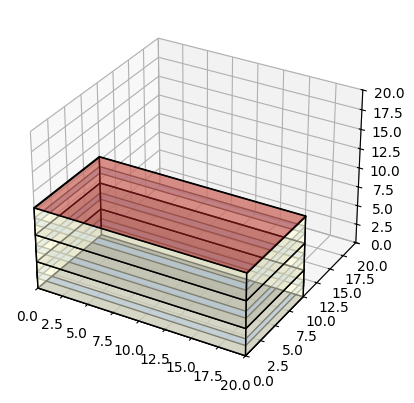

In [17]:
with tempfile.TemporaryDirectory() as temp_dir:
    output_dir = Path(temp_dir)
    config = SimulationPathConfig(output_dir=output_dir)
    idf = await asyncio.to_thread(model.build, config)
    idf.view_model()

In [ ]:
idf, results, err_text = await asyncio.to_thread(model.run)

In [ ]:
results